In [1]:
using Plots
using Plots, PlotRecipes
using LaTeXStrings

    +(AbstractArray

# Tarea 2

### Ejercicio 1

1) Consideren la función

\begin{equation}
z_{n+1} = z_n^2 + c, 
\end{equation}

con `c = 0.123 - 0.745im`. Definan una malla de valores iniciales $z_0$ en el intervalo $[-1,1]\times [-1,1]$ (parte real $\times$ parte imaginaria).

- ¿Cuantos valores finitos distintos (en el intervalo $[-1,1]\times [-1,1]$) se pueden obtener después de un gran número de iteraciones?

- Usando un color distinto para cada uno, grafiquen en el plano $\textrm{Re}(z) - \textrm{Im}(z)$ el conjunto obtenido.

In [2]:
#
# Definimos la función del problema
#

function F(x)
    y = x^2 + complex (0.123, 0.745)
    return y
end

, DataArrays.

F (generic function with 1 method)

In [3]:
#
# Creamos una función para graficar
#
# n número de iteraciones
# Step es el tamaño del paso
# Se recorre la malla desde la esquina (-1,-1) con pasos te tamaño Step, cada paso se itera n veces y dicho resultado
# se almacena en un vector llamado Datos. Posteriormente los datos almacenados se descomponen en parte real e imaginaria
# y se grafican de manera que al descomponer cada dato queden asosciada su parte real e imaginaria en el mismo punto.

function GraficadorF(n,Step)
    Datos = Complex64[]
    for i in -1.0:Step:1.0
        for j in -1.0:Step:1.0
            Num = complex(i,j)
            for k in 1:n
                y = F(Num)
                Num = y
            end
            push!(Datos,Num)
        end
    end
    Real = Float64[]
    Imag = Float64[]
    l = length(Datos)
    for i in 1:l
        push!(Real,real(Datos[i]))
        push!(Imag,imag(Datos[i]))
    end
    scatter(Real,Imag, 
    xaxis=(L"Real", (-1.0, 1.0), ), 
        yaxis=((-1.0, 1.0), L"Imaginario"), 
    legend=false, title=L"Z_{n+1} = Z_n + c", grid=true, markersize = 3.5)
end

DataArray) at C:\Users\Franco\.julia\v0.4\DataArrays\src\operators.jl:276
is ambiguous with: 
    +

GraficadorF (generic function with 1 method)

[Plots.jl] Initializing backend: pyplot


(WoodburyMatrices.SymWoodbury, AbstractArray{T<:Any, 2}) at C:\Users\Franco\.julia\v0.4\WoodburyMatrices\src\SymWoodburyMatrices.jl:107.
To fix, define 
    +(WoodburyMatrices.SymWoodbury, DataArrays.DataArray{T<:Any, 2})
before the new definition.
    +(AbstractArray, DataArrays.AbstractDataArray) at C:\Users\Franco\.julia\v0.4\DataArrays\src\operators.jl:300
is ambiguous with: 
    +(WoodburyMatrices.SymWoodbury, AbstractArray{T<:Any, 2}) at C:\Users\Franco\.julia\v0.4\WoodburyMatrices\src\SymWoodburyMatrices.jl:107.
To fix, define 
    +(WoodburyMatrices.SymWoodbury, DataArrays.AbstractDataArray{T<:Any, 2})
before the new definition.



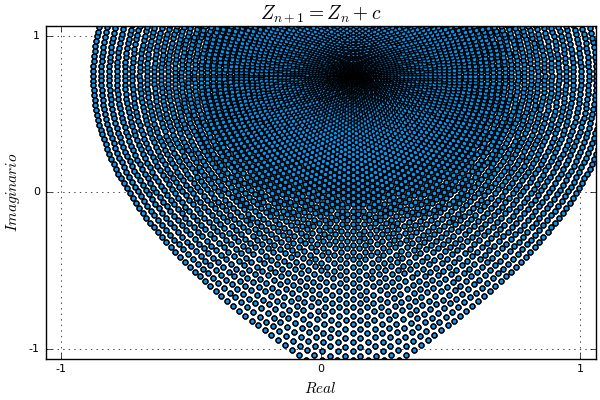

In [4]:
GraficadorF(1,0.015625) #Primera iteración]


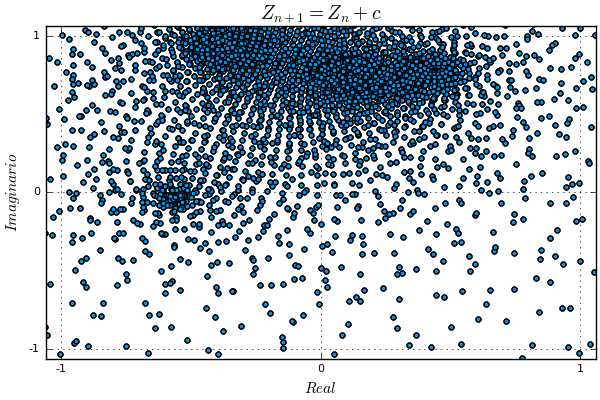

In [5]:
GraficadorF(5,0.015625) #5° iteración


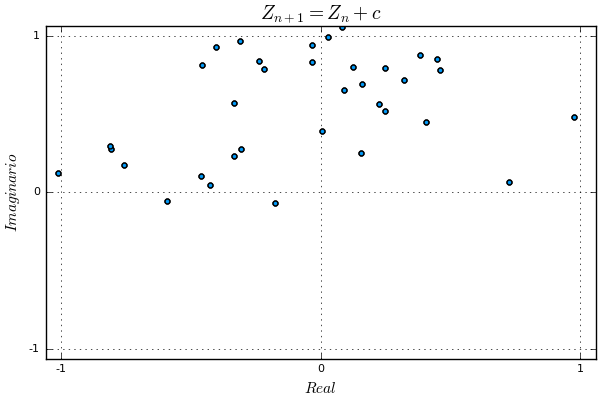

In [6]:
GraficadorF(25,0.015625) #25° iteración


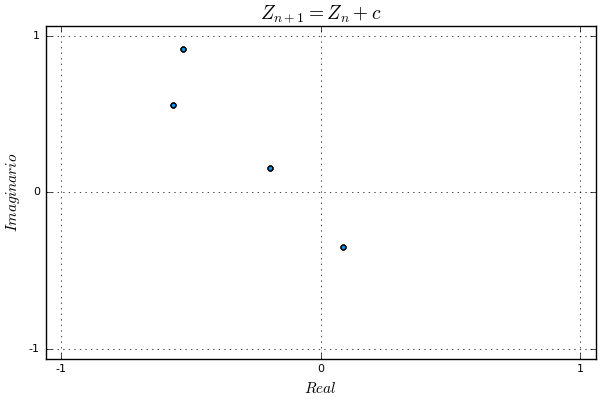

In [7]:
GraficadorF(35,0.015625) #30° iteración


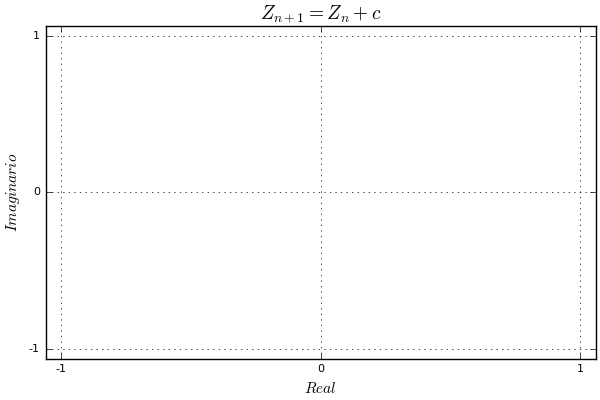

In [8]:
GraficadorF(50,0.015625) #50° iteración

No converge a ningún valor. Es muy probable que las dos raices de la función, que se encuentran dentro de este intervalo, sean puntos fijos repulsivos.

### Ejercicio 2

2) Usando la función `compute_roots` vista en clase, o en alguna variación propuesta por ustedes, definan (en Julia) el mapeo

\begin{equation}
x_{n+1} = B(x_{n}) = 2x_n \mod 1.
\end{equation}

- Obtengas los puntos fijos de este mapeo numéricamente. Los puntos fijos del mapeo son aquéllos que se mapean en si mismos, es decir, $x_{n} = B(x_{n})$. Este cálculo se puede hacer a mano, lo que debe usarse para comprobar que la implementación numérica funciona bien.

- Pensando en que la estabilidad de un punto fijo es el comportamiento que se observa de los iterados (a priori un número infinito) al considerar pequeñas desviaciones del punto fijo, ¿cuál es la estabilidad de los puntos fijos que se obtiene *numéricamente*, digamos, después de 100 iteraciones? ¿Pueden encontrar una explicación analítica de la observación numérica?

*Hint: Sean imaginos y no se conformen*

In [11]:
#
# Definimos la función del problema
# Usando ésta función abajo da un error mortal :(

function B(x)
    b = mod(2x,1)
    return b
end

B (generic function with 1 method)

In [9]:
function compute_roots(f, f´)
    initial_conditions = -20:0.125:20
    roots = similar(initial_conditions)
    for (j, x_0) in enumerate(initial_conditions)
        x = x_0

        # 100 iterations of Newton's method
        for i in 1:100
            x = x - f(x) / f´(x)
        end
        roots[j] = x
    end
    roots
end

compute_roots (generic function with 1 method)

In [25]:
#
# Creamos una analogía de Compute_roots para B debido a que 
# tengo problemas con la función abajo definida.
# Steps es la cantidad de pasos
# n es la cantidad de iteraciones

function compute_roots_B(Steps,n)
    B_roots = []
    B_IC = []
    for i in 0:Steps
        x = i / Steps
        push!(B_IC,x)
        for j in 1:n
            x = x - mod(2*x,1) * 0.5
        end
        push!(B_roots,x)
    end
    plot(B_IC,B_roots, 
        xaxis=((0.0,1.0),L"CondiciónInicial",), 
        yaxis=((0.0,1.0), L"Ráiz"), 
        legend=false, title=L"X_{n+1} = 2*X_n mod 1", grid=true)    
end

compute_roots_B (generic function with 1 method)


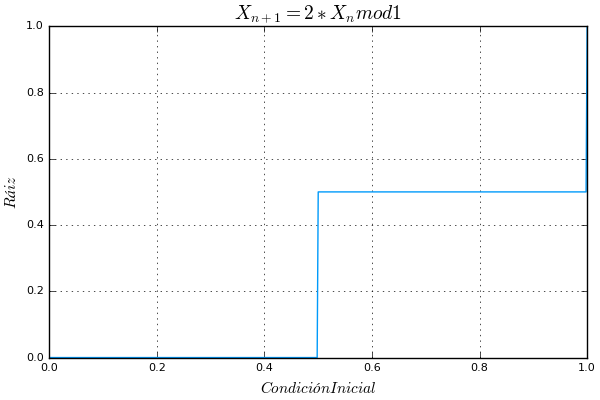

In [26]:
compute_roots_B(512,150)

Según la función (modificada) de compute_roots tenemos que 0.0, 0.5 y 1.0 son raices de B(x). Es fácil ver que sólo el cero es un punto fijo de B(x).

In [12]:
function GraficadorB(n,x0)
    Datos = Float64[x0]
    for i in 1:n
        y = mod(2*Datos[i],1)
        push!(Datos,y)
    end
    plot(Datos, 
    xaxis=(L"Iteración",), 
        yaxis=((0.0,1.0), L"B(x)"), 
        legend=false, title=L"X_{n+1} = 2*X_n mod 1", grid=true)    
end

GraficadorB (generic function with 1 method)


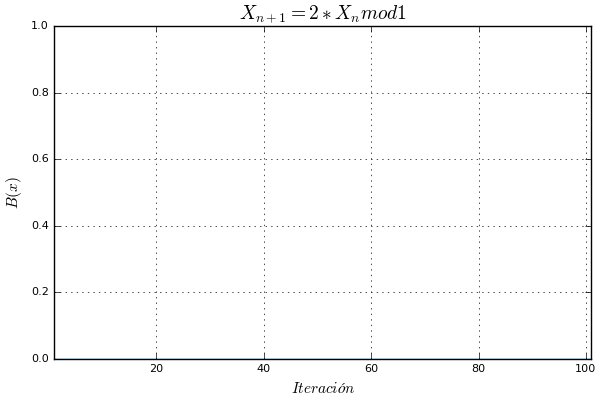

In [13]:
GraficadorB(100,0.0)


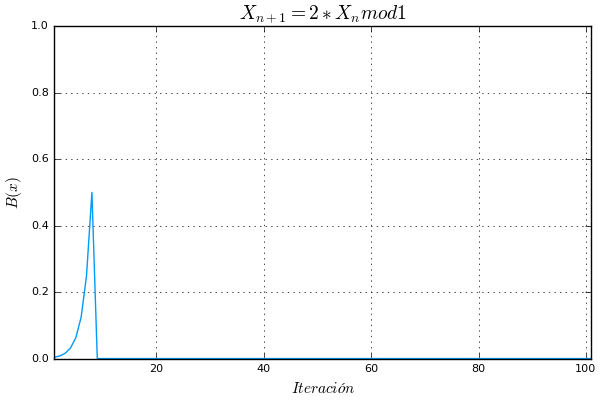

In [14]:
GraficadorB(100,0.00390625) # 1/256


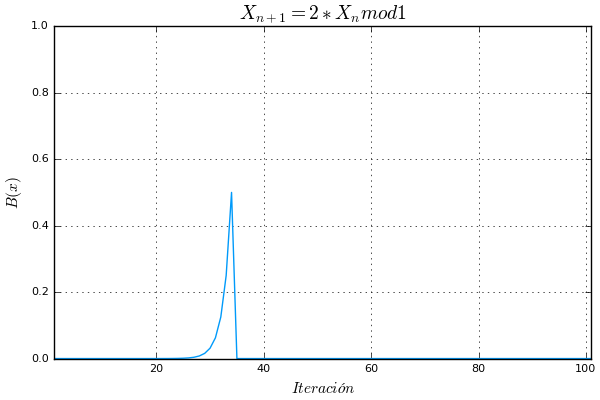

In [15]:
GraficadorB(100,5.82076609134674072265625e-11)  #Otro múltiplo de 2


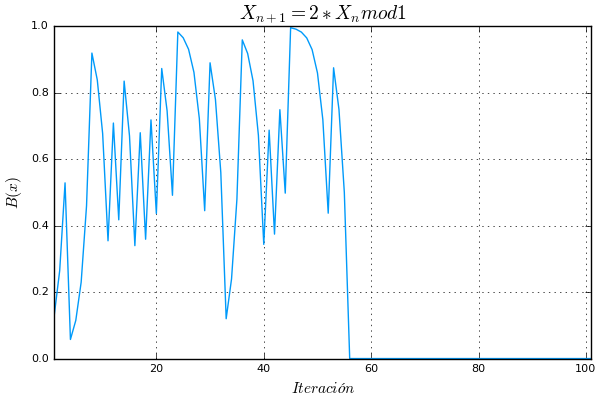

In [16]:
GraficadorB(100,0.132182)


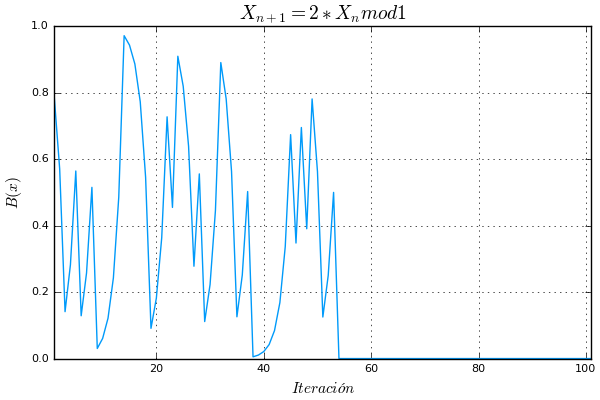

In [17]:
GraficadorB(100,0.785274852482)


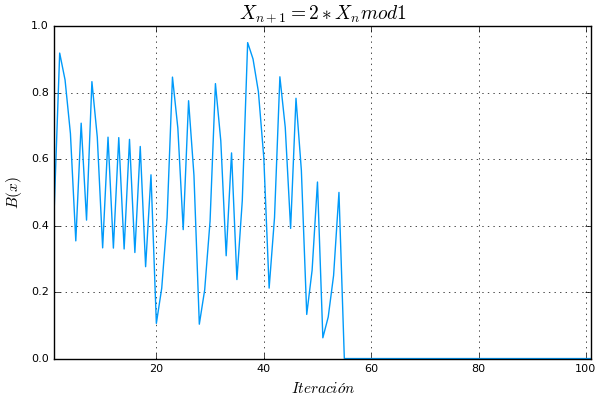

In [18]:
GraficadorB(100,0.45963498282)

El único punto fijo es el cero. Se observa que todo converge para una gran número de iteraciones por la manera en la que la máquina trata los datos.